In [22]:
# Imports
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import genfromtxt



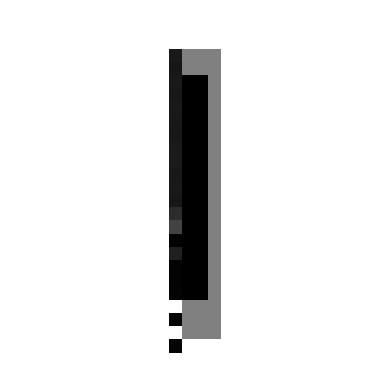

In [23]:
image1 = [[0] * 28 for _ in range(28)]
for i in range(5, 23):
    image1[i][14] = 1



with open("./assets/imageTwo.csv", 'r', encoding='utf-8-sig') as file:
    lines = file.readlines()

# Convert the lines into a list of lists containing numeric values
image_data = np.array([list(map(float, line.strip().split(','))) for line in lines])

# Display the binary image
plt.imshow(image_data, cmap='gray', interpolation='nearest')
plt.axis('off')  # Hide the axis
plt.show()
image1=(image_data)


kernel = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]



In [24]:
def convolve(image, kernel):
    # Get the dimensions of the image and the kernel
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    # print("Image dimensions (height, width) => ", image_height, image_width)
    # print("Kernel dimensions (height, width) => ", kernel_height, kernel_width)
    
    # Calculate the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    print("Output dimensions (height, width) => ", output_height, output_width)
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # plt.figure(1)
    # plt.imshow(output, cmap='gray')
    # plt.title('Initial Output Image')
    # plt.show()
    
    # Perform the convolution
    
    for i in range(output_height):
        #print("Processing row i => ", i)
        for j in range(output_width):
            #print("  Processing column j => ", j)
            sum_value = 0
            for m in range(kernel_height):
                #print("    Kernel row m => ", m)
                for n in range(kernel_width):
                    #print("      Kernel column n => ", n)
                    sum_value += image[i + m][j + n] * kernel[m][n]
                    #print("      Updated sum_value => ", sum_value)
            output[i][j] = sum_value
            #print("  Updated output at position (i, j) => ", output[i][j])
            
            # # Plot the current output after each update
            # plt.figure(fig_num)
            # plt.imshow(output, cmap='gray')
            # plt.title(f'Convolution Step: i={i}, j={j}')
            # plt.show()
            # fig_num += 1
            
    # print("Final output image after convolution:")
    # for row in output:
    #     print(row)
    
    return output


Output dimensions (height, width) =>  26 26
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 230.0, 127.0, -103.0, 0.0, -127.0, -127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 463.0, 254.0, -209.0, 0.0, -254.0, -254.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 693.0, 509.0, -184.0, -128.0, -509.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 695.0, 637.0, -58.0, -256.0, -637.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 692.0, 765.0, 73.0, -384.0, -765.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 693.0, 765.0, 72.0, -384.0, -765.0, -381.0, 0.0,

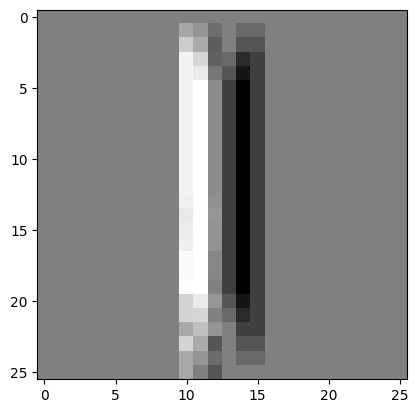

In [25]:
# Convolve the image with the kernel
output_image1 = convolve(image1, kernel)
plt.imshow(output_image1, cmap="gray")

# Print the convolved image (output)
for row in output_image1:
    print(row)


In [26]:
def max_pooling(image, pool_size=2):
    image_height, image_width = len(image), len(image[0])
    pool_height, pool_width = pool_size, pool_size
    
    # Calculate output dimensions
    output_height = image_height // pool_height
    output_width = image_width // pool_width
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # Perform max pooling
    for i in range(output_height):
        for j in range(output_width):
            # Define the window
            window = [image[i * pool_height + m][j * pool_width + n] 
                      for m in range(pool_height) for n in range(pool_width)]
            # Find the maximum value in the window
            output[i][j] = max(window)
            
    return output


[0.0, 0.0, 0.0, 0.0, 0.0, 230.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 693.0, 0.0, -254.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 73.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 72.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 76.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 77.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 93.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 135.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 102.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 39.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 637.0, 134.0, -381.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 500.0, 131.0, -254.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 250.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


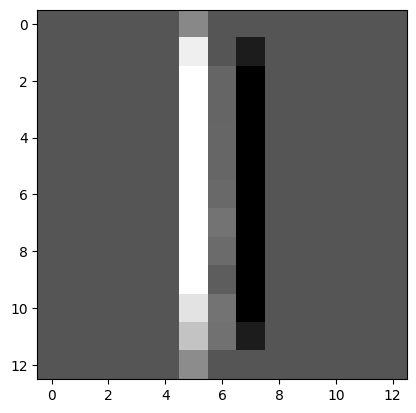

In [27]:
# Convolve the image with the kernel
pool_image1 = max_pooling(output_image1)
plt.imshow(pool_image1, cmap="gray")

# Print the convolved image (output)
for row in pool_image1:
    print(row)

In [28]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:

x = tf.concat([x_train, x_test], axis=0)
labels = tf.concat([y_train, y_test], axis=0)
image_data=x[labels==1][0]
print(image_data)

tf.Tensor(
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0

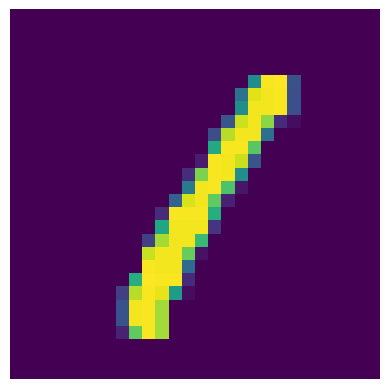

In [30]:
plt.imshow(image_data)
plt.axis('off')
plt.show()